<a href="https://colab.research.google.com/github/iDreamVA/rabbit-vs-cat/blob/main/dear1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split

In [ ]:
!kaggle datasets download -d muniryadi/cat-vs-rabbit
!unzip cat-vs-rabbit.zip

Dataset URL: https://www.kaggle.com/datasets/muniryadi/cat-vs-rabbit
License(s): other
 86% 57.0M/65.9M [00:01<00:00, 69.8MB/s]
100% 65.9M/65.9M [00:01<00:00, 52.7MB/s]
Archive:  cat-vs-rabbit.zip
  inflating: test-images/cat/cat.208.jpg  
  inflating: test-images/cat/cat.209.jpg  
  inflating: test-images/cat/cat.210.jpg  
  inflating: test-images/cat/cat.233.jpg  
  inflating: test-images/cat/cat.234.jpg  
  inflating: test-images/cat/cat.235.jpg  
  inflating: test-images/cat/cat.236.jpg  
  inflating: test-images/cat/cat.237.jpg  
  inflating: test-images/cat/cat.238.jpg  
  inflating: test-images/cat/cat.239.jpg  
  inflating: test-images/rabbit/images-2.jpeg  
  inflating: test-images/rabbit/images-3.jpeg  
  inflating: test-images/rabbit/images-4.jpeg  
  inflating: test-images/rabbit/images.jpeg  
  inflating: test-images/rabbit/rabbit_test.jpeg  
  inflating: train-cat-rabbit/cat/cat.1.jpg  
  inflating: train-cat-rabbit/cat/cat.10.jpg  
  inflating: train-cat-rabbit/cat/cat.1

In [ ]:
width = 128
num_classes = 2
trainpath = 'train-cat-rabbit/'
testpath = 'test-images/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]

In [ ]:
trainImg , testImg

(['train-cat-rabbit/rabbit', 'train-cat-rabbit/cat'],
 ['test-images/rabbit', 'test-images/cat'])

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)

            l = imagePath.split('/')[1]

            if l == 'cat':
              labels.append([1,0])
            elif l == 'rabbit':
              labels.append([0,1])



  return rawImgs, labels



---



In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 10/10 [00:00<00:00, 700.39it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1600, 128, 128, 3), (1600, 2), (15, 128, 128, 3), (15, 2))

start

In [ ]:
model0 = Sequential([
        Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        MaxPool2D(2),
        Conv2D(128,(3,3) , activation='relu'),
        MaxPool2D(pool_size=(2,2 )),
        Dense(16),
        Flatten(),

        Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30, 30, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │          28,802 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,034 (711.07 KB)

 Trainable params: 182,034 (711.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
batch_size = 32
epochs = 10

In [ ]:
history = model0.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5730 - loss: 0.7114 - val_accuracy: 0.6667 - val_loss: 0.6217
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7497 - loss: 0.4779 - val_accuracy: 0.7333 - val_loss: 0.4486
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8017 - loss: 0.4073 - val_accuracy: 0.8000 - val_loss: 0.3916
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8553 - loss: 0.3245 - val_accuracy: 0.8000 - val_loss: 0.2571
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9066 - loss: 0.2530 - val_accuracy: 1.0000 - val_loss: 0.1673
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9246 - loss: 0.2006 - val_accuracy: 0.8000 - val_loss: 0.4066
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9441 - loss: 0.1521 - val_accuracy: 1.0000 - val_loss: 0.0251
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9699 - loss: 0.0785 - val_accuracy: 1.0000 - 

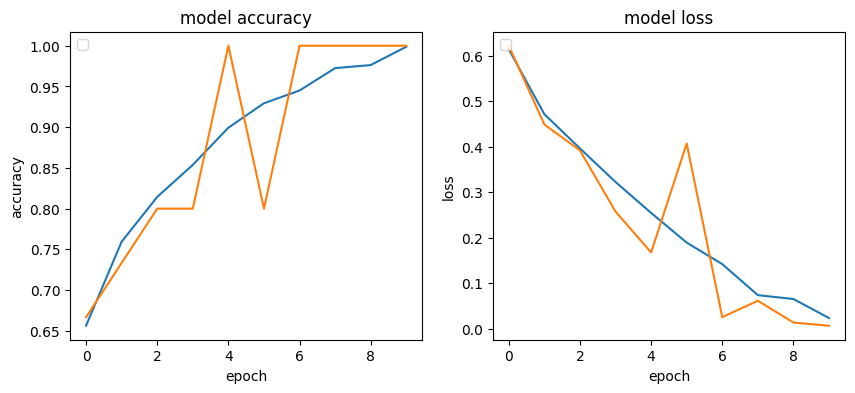

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])


In [ ]:
testpath = 'test-images/'
testImg = [testpath+f for f in listdir(testpath)]
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):
        file = join(imagePath, item)
        print(file)

test-images/rabbit/images-3.jpeg
test-images/rabbit/images-2.jpeg
test-images/rabbit/images-4.jpeg
test-images/rabbit/rabbit_test.jpeg
test-images/rabbit/images.jpeg
test-images/cat/cat.209.jpg
test-images/cat/cat.239.jpg
test-images/cat/cat.237.jpg
test-images/cat/cat.238.jpg
test-images/cat/cat.236.jpg
test-images/cat/cat.235.jpg
test-images/cat/cat.208.jpg
test-images/cat/cat.210.jpg
test-images/cat/cat.233.jpg
test-images/cat/cat.234.jpg


test-images/rabbit/images-3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


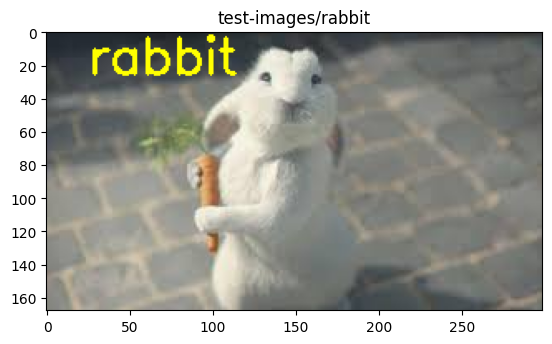

test-images/rabbit/images-2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


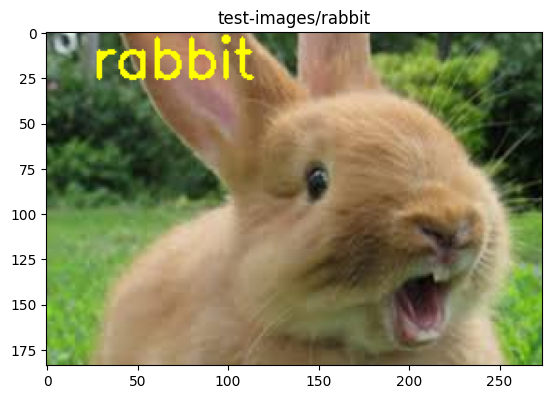

test-images/rabbit/images-4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


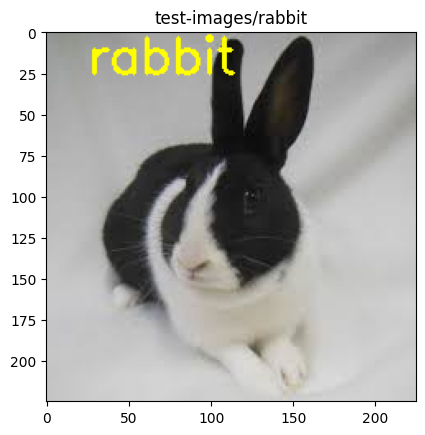

test-images/rabbit/rabbit_test.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


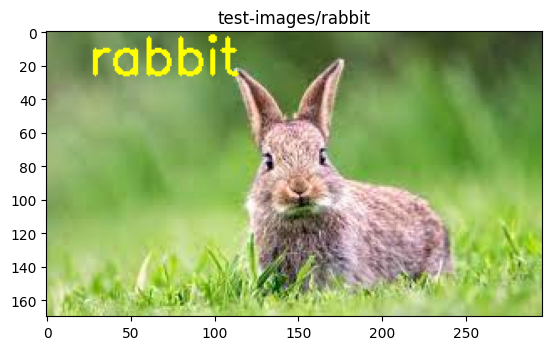

test-images/rabbit/images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


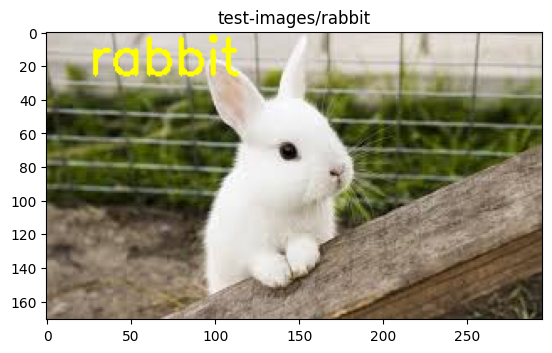

test-images/cat/cat.209.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


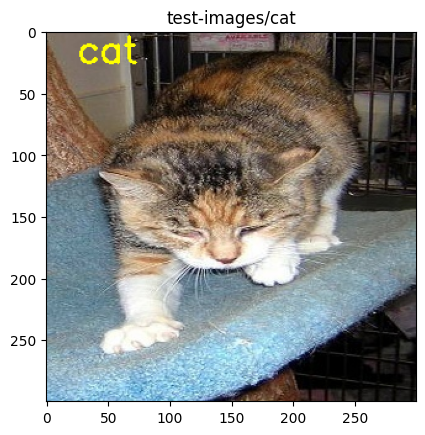

test-images/cat/cat.239.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


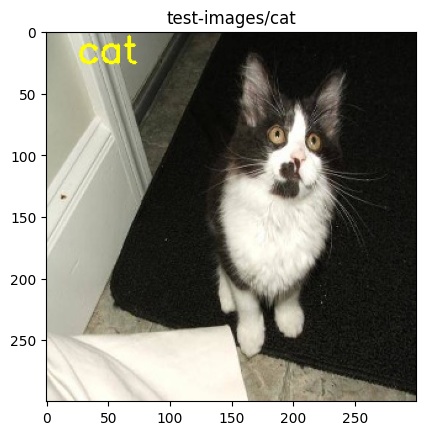

test-images/cat/cat.237.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


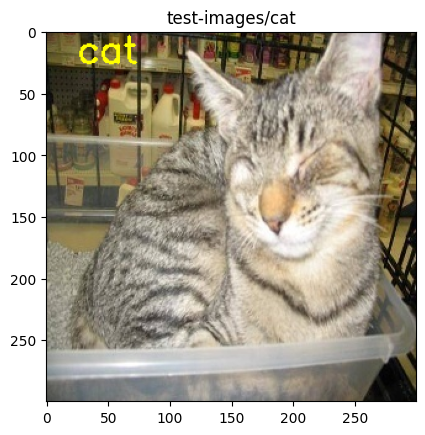

test-images/cat/cat.238.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


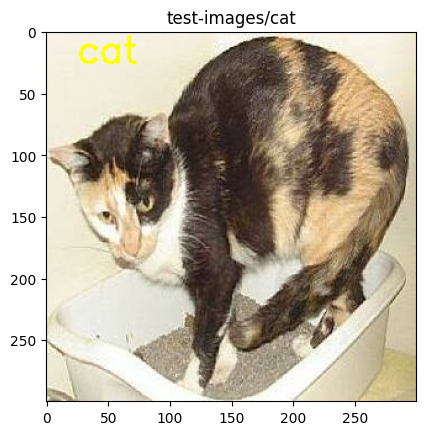

test-images/cat/cat.236.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


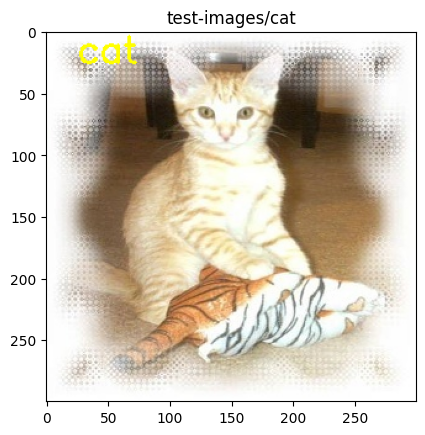

test-images/cat/cat.235.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


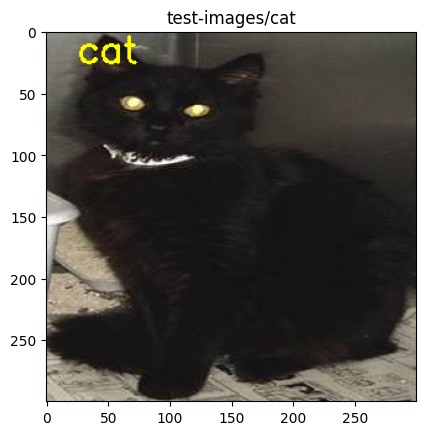

test-images/cat/cat.208.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


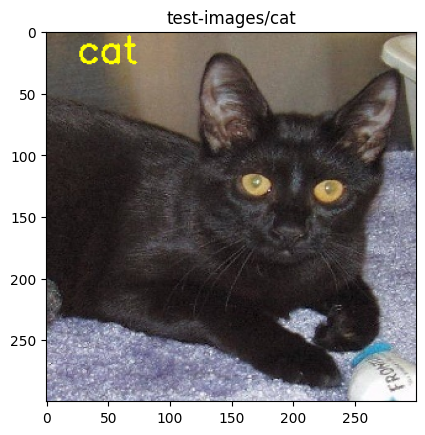

test-images/cat/cat.210.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


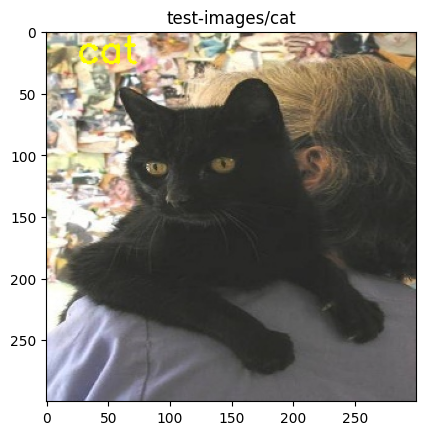

test-images/cat/cat.233.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


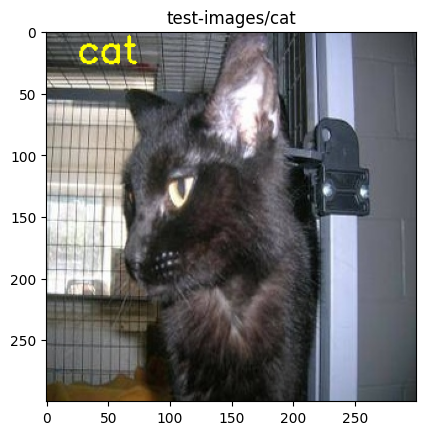

test-images/cat/cat.234.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


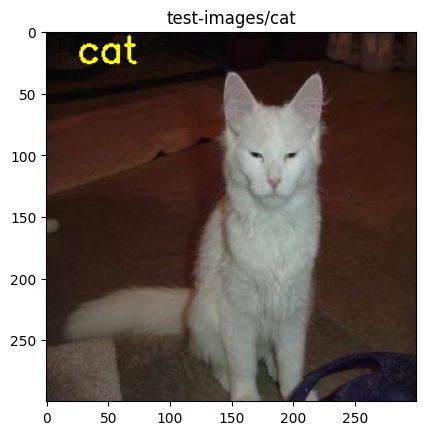

In [ ]:
testpath = 'test-images/'
testImg = [testpath+f for f in listdir(testpath)]
rimg = []
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):

        file = join(imagePath, item)
        if file[-1] =='g':
          print(file)
          imgori = cv2.imread(file)
          imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
          img = cv2.resize(imgori ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model0.predict(rimg)
          label = ['cat','rabbit']
          result = label[np.argmax(predict)]
          plt.title(imagePath)
          cv2.putText(imgori, str(result), (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2 )

          plt.imshow(imgori)
          plt.show()


In [ ]:
model0.save("model.h5")

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 2

model = Sequential([
        base_model,

        Conv2D(128, 3, activation='relu'),
        Dense(16),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])


In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30, 30, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │          28,802 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546,104 (2.08 MB)

 Trainable params: 182,034 (711.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364,070 (1.39 MB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
batch_size = 32
epochs = 10

In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.8297 - loss: 1.8760 - val_accuracy: 1.0000 - val_loss: 2.0986e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9939 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 1.9975e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 4.2961e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 8.8271e-04 - val_accuracy: 1.0000 - val_loss: 1.1427e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 1.2389e-04 - val_accuracy: 1.0000 - val_loss: 1.2171e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 9.9176e-05 - val_accuracy: 1.0000 - val_loss: 1.0399e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 7.9375e-05 - val_accuracy: 1.0000 - val_loss: 9.5705e-05
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0

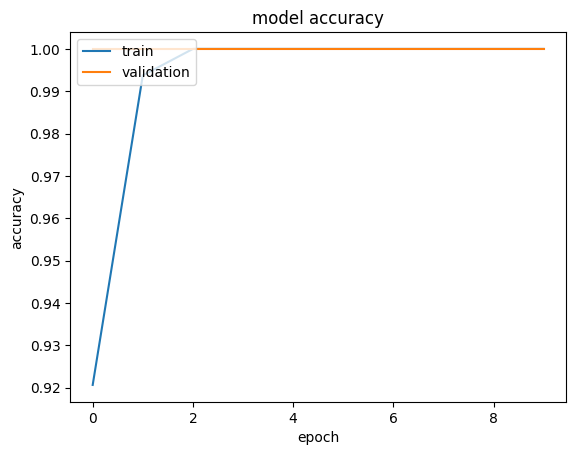

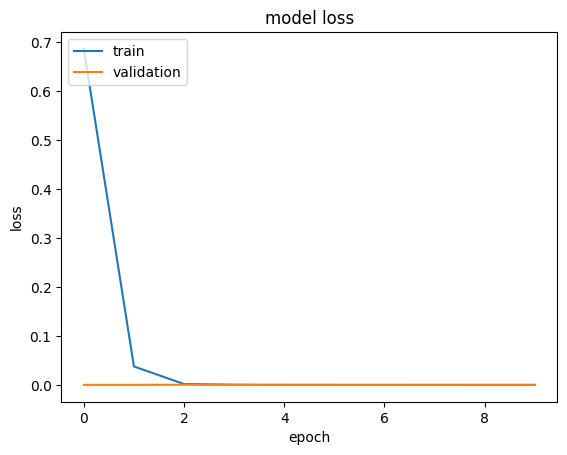

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[0.00100227 0.99899775]]
real:images-3.jpeg
predict:rabbit


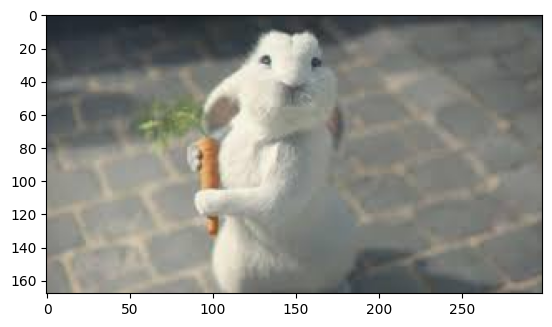

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[6.827549e-10 1.000000e+00]]
real:images-2.jpeg
predict:rabbit


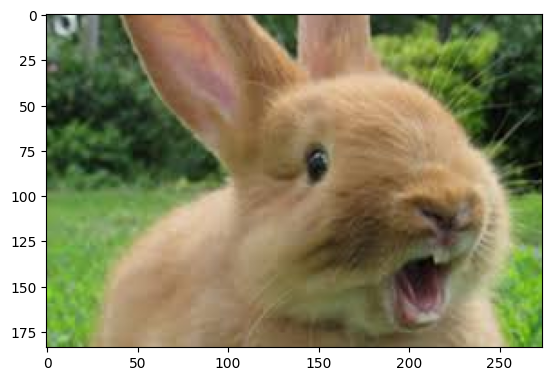

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.0028481e-11 1.0000000e+00]]
real:images-4.jpeg
predict:rabbit


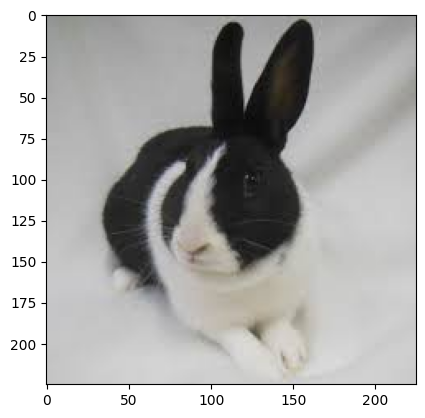

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.3032914e-15 1.0000000e+00]]
real:rabbit_test.jpeg
predict:rabbit


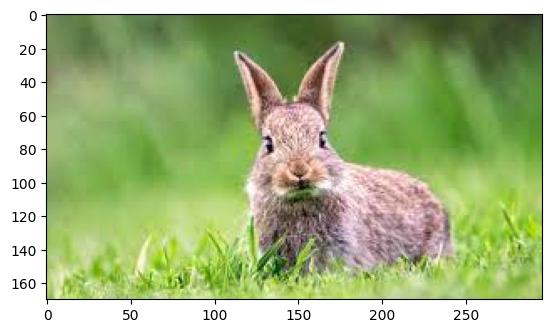

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[8.826522e-15 1.000000e+00]]
real:images.jpeg
predict:rabbit


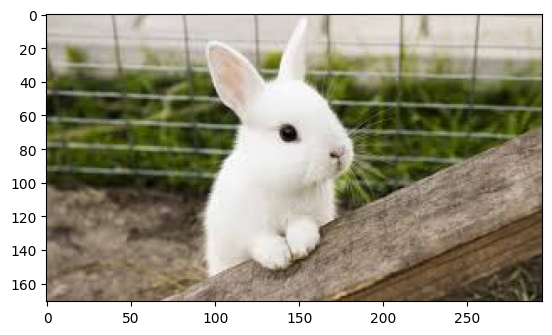

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.000000e+00 1.466234e-13]]
real:cat.209.jpg
predict:cat


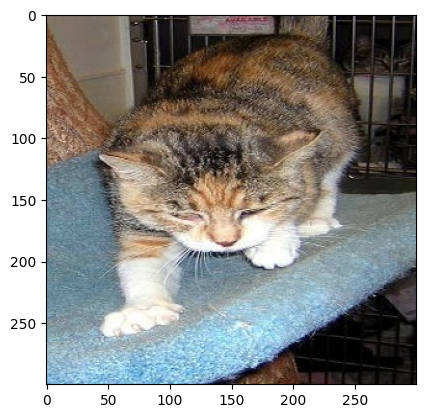

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.0000000e+00 1.3876195e-10]]
real:cat.239.jpg
predict:cat


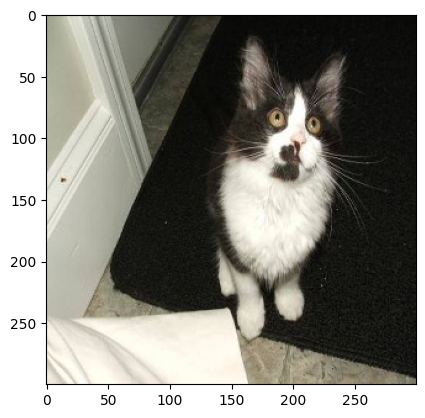

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.0000000e+00 1.1259666e-13]]
real:cat.237.jpg
predict:cat


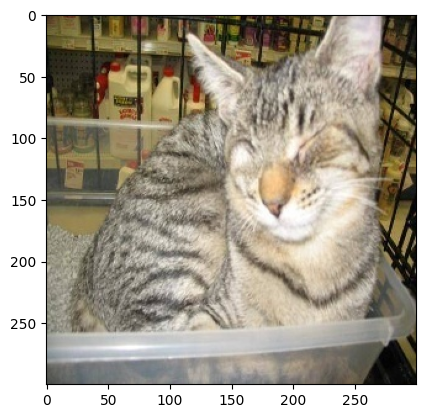

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.0000000e+00 3.9364558e-12]]
real:cat.238.jpg
predict:cat


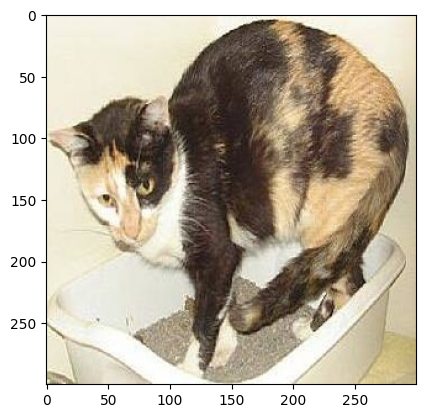

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1.0000000e+00 1.2252808e-09]]
real:cat.236.jpg
predict:cat


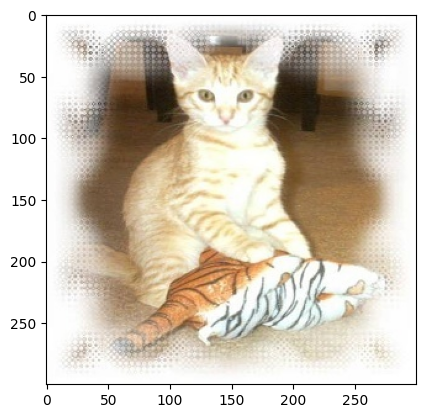

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[9.99879956e-01 1.20000914e-04]]
real:cat.235.jpg
predict:cat


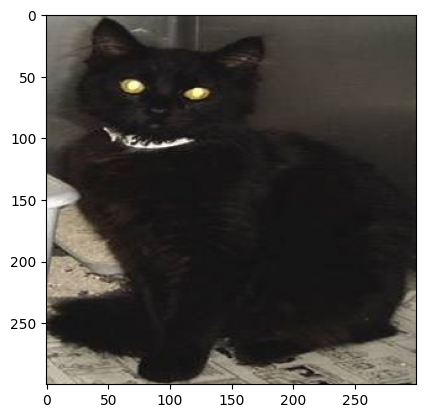

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[1.0000000e+00 1.2726793e-09]]
real:cat.208.jpg
predict:cat


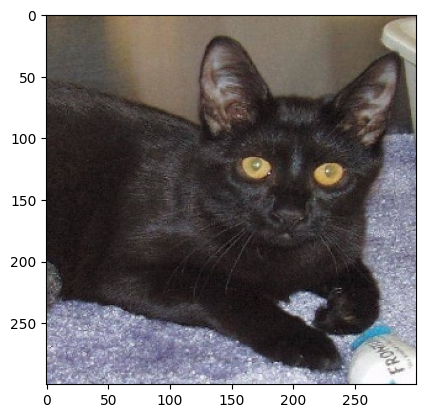

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.000000e+00 1.956978e-16]]
real:cat.210.jpg
predict:cat


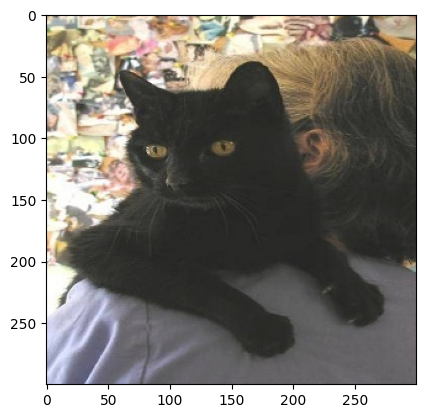

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[9.9998283e-01 1.7168422e-05]]
real:cat.233.jpg
predict:cat


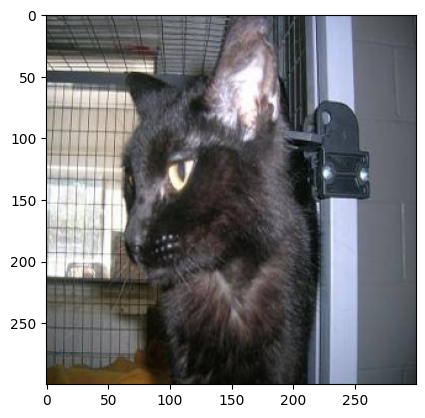

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1.0000000e+00 1.8232879e-11]]
real:cat.234.jpg
predict:cat


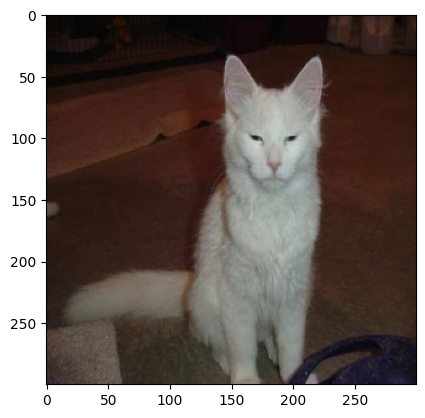

In [ ]:
  testpath = 'test-images/'
  testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
  rimg = []
  for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":

          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['cat','rabbit']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

In [ ]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False,
)

NameError: name 'keras' is not defined